<br>

<br>

## 1) Configuration du notebook 

In [2]:
%reload_ext autoreload
%autoreload 2<br>
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

On définit par la variable path le chemin vers le dossier parents qui contient les fichiers .csv de nos différentes catégories d'images.

# 2) Importation des données

<br>

In [4]:
path = Path('data/')

In [5]:
for file, folder in [('basket.csv','Basket'),
                    ('bottinesfemmes.csv','Bottines_femmes'),
                    ('chaussuresfemmestalon.csv', 'Chaussures_femmes'),
                    ('richelieufemmes.csv', 'Richelieu_femmes')]:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=2000)

Error https://photos6.andre.fr/photos/839/8396961/8396961_500_A.jpg HTTPSConnectionPool(host='photos6.andre.fr', port=443): Max retries exceeded with url: /photos/839/8396961/8396961_500_A.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://photos6.andre.fr/photos/839/8398014/8398014_350_A.jpg HTTPSConnectionPool(host='photos6.andre.fr', port=443): Max retries exceeded with url: /photos/839/8398014/8398014_350_A.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://photos6.andre.fr/photos/619/6194972/6194972_500_A.jpg HTTPSConnectionPool(host='photos6.andre.fr', port=443): Max retries exceeded with url: /photos/619/6194972/6194972_500_A.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error h

Error http://www.didf-jeunes.fr/images/Qp81qS148eBX/noir-chaussures-bottines-femme-plates-ouvertes-S-Adonner-%C3%80-4F7F_4.jpg HTTPConnectionPool(host='www.didf-jeunes.fr', port=80): Max retries exceeded with url: /images/Qp81qS148eBX/noir-chaussures-bottines-femme-plates-ouvertes-S-Adonner-%C3%80-4F7F_4.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f2094626ef0>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error http://www.plumes-du-web.fr/images/image/femme%20chaussures/bottines/Style%20simple%20Miss%20Coquines%20Bottines%20Femme%20plates%20569531%20-%20NOIR%20-%20Chaussures%20XD89592.jpg HTTPConnectionPool(host='www.plumes-du-web.fr', port=80): Max retries exceeded with url: /images/image/femme%20chaussures/bottines/Style%20simple%20Miss%20Coquines%20Bottines%20Femme%20plates%20569531%20-%20NOIR%20-%20Chaussures%20XD89592.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f209462f86

Error http://www.lassay-tourisme.fr/images/chaussures%20femme/timberland%20chaussures/Parfait%20Bottines%20Femme%20Timberland%20Nellie%20-%20chukka%20plates%20%C3%A0%20lacets%20doubles%20vc40io2879%20.jpg HTTPConnectionPool(host='www.lassay-tourisme.fr', port=80): Max retries exceeded with url: /images/chaussures%20femme/timberland%20chaussures/Parfait%20Bottines%20Femme%20Timberland%20Nellie%20-%20chukka%20plates%20%C3%A0%20lacets%20doubles%20vc40io2879%20.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f2094626dd8>, 'Connection to www.lassay-tourisme.fr timed out. (connect timeout=4)'))
Error http://www.youdesir.fr/image/cache/data/category_36/bottines-et-bottes-femme-pas-cher-bottines-de-neige-femme-plates-pour-garder-la-ch--8261-600x600_0.jpg HTTPConnectionPool(host='www.youdesir.fr', port=80): Max retries exceeded with url: /image/cache/data/category_36/bottines-et-bottes-femme-pas-cher-bottines-de-neige-femme-plates-pour-garder-la-ch--8261-600x6

Error http://www.fotomotion.fr/image/cache/data/category_31/topshop-gallery-escarpins-a-talons-hauts-femme-talon-aiguille-sans-lacets-chaussures-2055-500x500.jpg HTTPConnectionPool(host='www.fotomotion.fr', port=80): Max retries exceeded with url: /image/cache/data/category_31/topshop-gallery-escarpins-a-talons-hauts-femme-talon-aiguille-sans-lacets-chaussures-2055-500x500.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f20935cbf60>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error http://www.emploi-formation-bmp.fr/images/category_29/SHOESHAOGE%20Les%20Chaussures%20Agrave%20Talons%20Hauts%20Sandales%20Femme%20Taiwan%20Impermeacuteables%20Chaussures%20Femmes%20Chaussures%20Bouche%20Fine%20Avec%20Des%20Poissons%20B07BWF6VWW.jpg HTTPConnectionPool(host='www.emploi-formation-bmp.fr', port=80): Max retries exceeded with url: /images/category_29/SHOESHAOGE%20Les%20Chaussures%20Agrave%20Talons%20Hauts%20Sandales

Error http://www.sprlceline.eu/nike%20shox%20pas%20cher/chaussures-richelieu-kickers%2Cchaussures-richelieu-avec-jean%2Cchaussures-richelieu-free-lance.jpg HTTPConnectionPool(host='www.sprlceline.eu', port=80): Max retries exceeded with url: /nike%20shox%20pas%20cher/chaussures-richelieu-kickers%2Cchaussures-richelieu-avec-jean%2Cchaussures-richelieu-free-lance.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f209462f668>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error http://www.angeliquezaini.fr/images/category_55/Richelieu%20blanc%20et%20noir%20-%20Derbies%20-%20Chaussures%20femme%20Textile%20WAYVKU%20Anti-d%C3%A9rapante.jpg HTTPConnectionPool(host='www.angeliquezaini.fr', port=80): Max retries exceeded with url: /images/category_55/Richelieu%20blanc%20et%20noir%20-%20Derbies%20-%20Chaussures%20femme%20Textile%20WAYVKU%20Anti-d%C3%A9rapante.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection obj

Error http://www.undonundessin.fr/images/chaussures%20femme/derbies%20%20richelieu%20chaussures/Satisfaisant%20Derbies%20Richelieu%20Derbies%20Pas%20Cher%20-%20Ambra%20Pas%20Chere%2010EL787%20Chaussures%20Femme.jpg HTTPConnectionPool(host='www.undonundessin.fr', port=80): Max retries exceeded with url: /images/chaussures%20femme/derbies%20%20richelieu%20chaussures/Satisfaisant%20Derbies%20Richelieu%20Derbies%20Pas%20Cher%20-%20Ambra%20Pas%20Chere%2010EL787%20Chaussures%20Femme.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f2094626a58>, 'Connection to www.undonundessin.fr timed out. (connect timeout=4)'))
Error http://www.leonveyret.fr/images/leon/Chaussures%20Homme%20-%20Richelieu%20Gino%20-%2069849%20Bleu.jpg HTTPConnectionPool(host='www.leonveyret.fr', port=80): Max retries exceeded with url: /images/leon/Chaussures%20Homme%20-%20Richelieu%20Gino%20-%2069849%20Bleu.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7

In [6]:
for folder in ('Basket','Bottines_femmes','Chaussures_femmes','Richelieu_femmes'):
    print(folder)
    verify_images(path/folder, delete=True)

Basket


cannot identify image file <_io.BufferedReader name='data/Basket/00000368.jpg'>


/home/fatima_moqran/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/fatima_moqran/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/Basket/00000365.jpg'>
cannot identify image file <_io.BufferedReader name='data/Basket/00000297.jpg'>
cannot identify image file <_io.BufferedReader name='data/Basket/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='data/Basket/00000205.jpg'>
cannot identify image file <_io.BufferedReader name='data/Basket/00000311.jpg'>
cannot identify image file <_io.BufferedReader name='data/Basket/00000354.jpg'>
Bottines_femmes


cannot identify image file <_io.BufferedReader name='data/Bottines_femmes/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='data/Bottines_femmes/00000049.jpg'>
cannot identify image file <_io.BufferedReader name='data/Bottines_femmes/00000180.jpg'>
cannot identify image file <_io.BufferedReader name='data/Bottines_femmes/00000126.jpg'>
cannot identify image file <_io.BufferedReader name='data/Bottines_femmes/00000219.jpg'>
cannot identify image file <_io.BufferedReader name='data/Bottines_femmes/00000117.jpg'>
Chaussures_femmes


cannot identify image file <_io.BufferedReader name='data/Chaussures_femmes/00000280.png'>
cannot identify image file <_io.BufferedReader name='data/Chaussures_femmes/00000146.png'>
cannot identify image file <_io.BufferedReader name='data/Chaussures_femmes/00000248.png'>
cannot identify image file <_io.BufferedReader name='data/Chaussures_femmes/00000127.jpg'>
cannot identify image file <_io.BufferedReader name='data/Chaussures_femmes/00000340.jpg'>
cannot identify image file <_io.BufferedReader name='data/Chaussures_femmes/00000247.jpg'>
Richelieu_femmes


cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000217.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000083.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000073.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000383.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000293.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000258.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000062.png'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000325.jpg'>
cannot identify image file <_io.BufferedReader name='data/Richelieu_femmes/00000084.jpg'>


# 3) Préparation des données

<br>

In [7]:
np.random.seed(8)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['Basket', 'Bottines_femmes', 'Chaussures_femmes', 'Richelieu_femmes']

On demande d'afficher l'échantillon d'images qu'on définit avec les arguments suivant:<br>
On demande quatre colonnes avec rows, et figsize l'affichage des images de la batch.

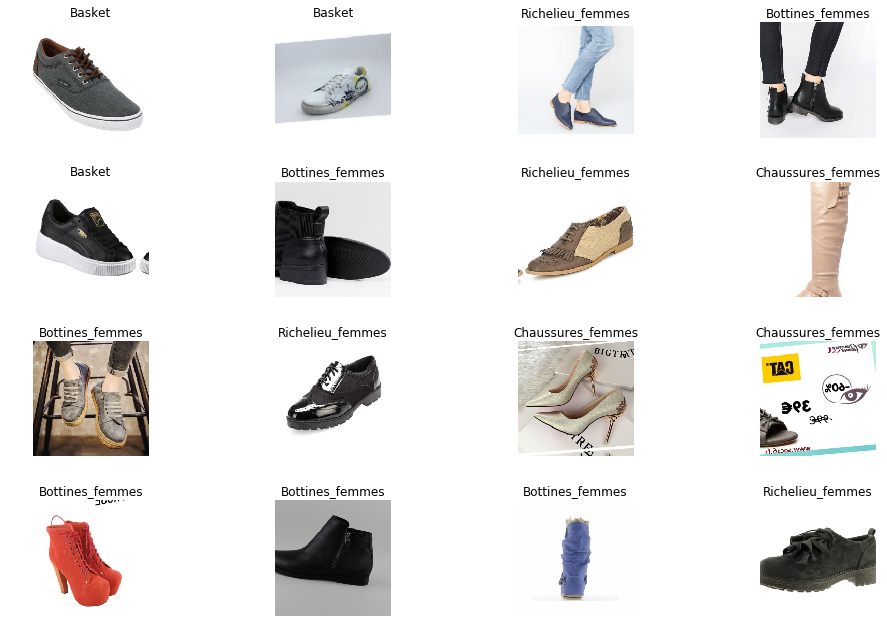

In [9]:
data.show_batch(rows=4, figsize=(14,9))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Basket', 'Bottines_femmes', 'Chaussures_femmes', 'Richelieu_femmes'],
 4,
 1159,
 289)

# 4) Création du réseau de neurone et du modèle

<br>

On initialise notre réseau de neurone avec create_cnn en lui précisant notre dataset, l'architecture ResNet et error_rate qui est notre métric permettant d'évaluer l'efficacité de notre modèle.

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

On précise avec torch.device('cuda') que l'on travaille bien avec le GPU et non le CPU.

In [12]:
defaults.device = torch.device('cuda')

On demande à notre modèle d'apprendre avec la classe fit_one_cycle (1cycle policy) et en lui précisant le nombre d'epochs.

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.300695,0.741319,0.290657,00:12
1,0.924800,0.700122,0.207612,00:12
2,0.749100,0.667839,0.249135,00:13
3,0.645936,0.653354,0.231834,00:12


On sauvegarde notre modèle dans le path prédéfini.

In [14]:
learn.save('chaussures34_1')

# 5) Nettoyage du dataset

<br>

In [15]:
import sys
!conda install --yes --prefix {sys.prefix} ipywidgets
from fastai.widgets import *

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



DatasetFormatter permet de retourner le dataset avec les données sous un bon format et correctement indexé.<br>
from_toplosses permet de prendre les images pour lesquelles le modèle se trompe le plus.

In [16]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [17]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

On utilise pandas pour lire le fichier cleaned.csv et on affiche avec head les 5 premières données avec le nom des fichiers et leurs classes.

In [18]:
df = pd.read_csv(path/'cleaned.csv', header='infer')
df.head()

,name,label
0,Basket/00000216.jpg,Basket
1,Basket/00000237.jpg,Basket
2,Basket/00000032.jpg,Basket
3,Basket/00000287.jpg,Basket
4,Basket/00000397.jpg,Basket


On vérifie que les noms de fichiers ne sont pas corrompus.

In [19]:
df[(df['name'].apply(lambda x: len(x)<5))]

,name,label


# 6) Entrainement du modèle avec le nouveau dataset nettoyé

<br>

On réaffecte un random seed de 8.<br>
On recrée l'ImageDataBunch avec notre nouveau dataset nettoyé.

In [20]:
np.random.seed(8)
db = (ImageList.from_df(df, path)
     .split_by_rand_pct(0.2)
     .label_from_df()
     .transform(get_transforms(), size=224)
     .databunch(bs=9)).normalize(imagenet_stats)

Dataset non nettoyé :

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Basket', 'Bottines_femmes', 'Chaussures_femmes', 'Richelieu_femmes'],
 4,
 1159,
 289)

Dataset nettoyé :

In [22]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['Basket', 'Bottines_femmes', 'Chaussures_femmes', 'Richelieu_femmes'],
 4,
 905,
 226)

On affiche une batch:

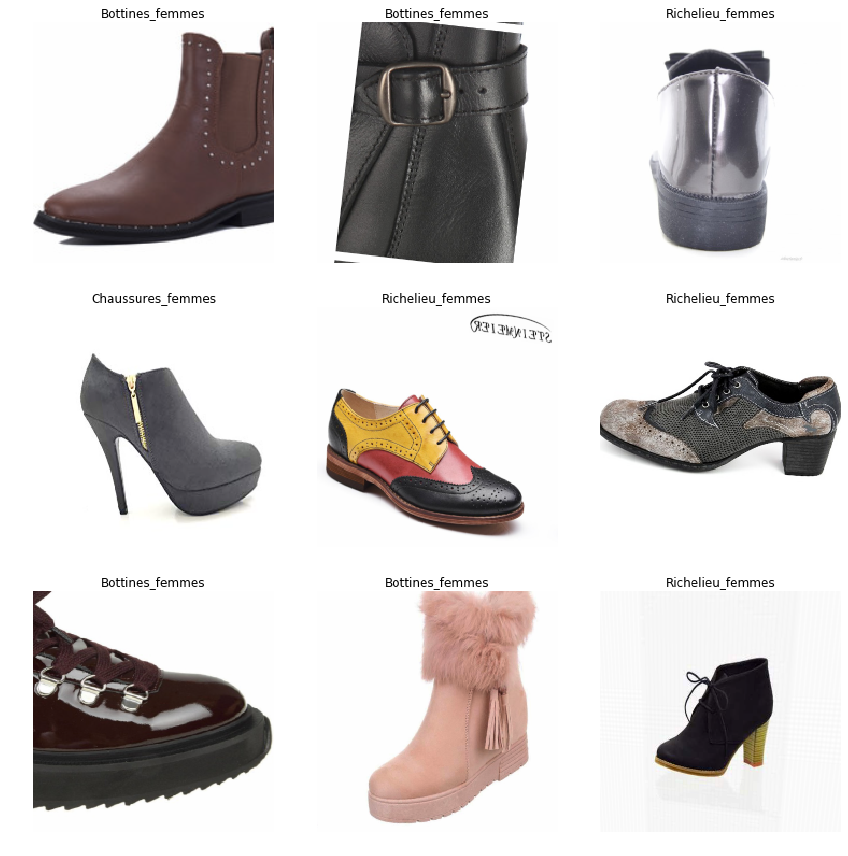

In [23]:
db.show_batch()

On réentraîne notre nouveau dataset

In [42]:
learn = cnn_learner(db, models.resnet34, metrics=error_rate)

In [43]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.146871,0.621572,0.203540,00:08
1,0.886317,0.582841,0.194690,00:08
2,0.695588,0.529128,0.185841,00:08
3,0.576446,0.545105,0.194690,00:08


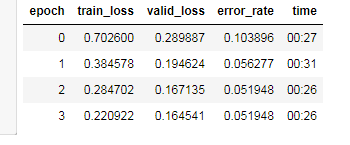

In [44]:
learn.save('chaussures34-2')

In [45]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.965863,0.653012,0.225664,00:08


In [47]:
learn.load('chaussures34-2')

Learner(data=ImageDataBunch;

Train: LabelList (905 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Basket,Basket,Basket,Basket,Basket
Path: data;

Valid: LabelList (226 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Chaussures_femmes,Chaussures_femmes,Bottines_femmes,Chaussures_femmes,Basket
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mome

Permet de trouver le learning rate qu'on affiche avec recorder.plot

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


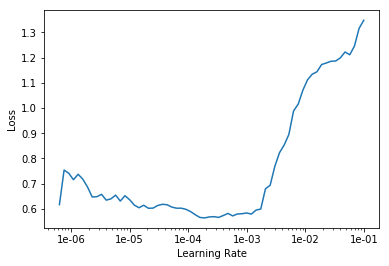

In [49]:
learn.recorder.plot()

On réentraîne le modèle selon l'intervall de learning rate choisi.

In [50]:
learn.fit_one_cycle(4, max_lr=slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.861567,1.056995,0.309734,00:09
1,0.783230,0.577427,0.203540,00:09
2,0.645813,0.413104,0.123894,00:09
3,0.388361,0.370022,0.101770,00:09


On sauvegarde le deuxième modèle.

ClassificationInterpretation est une fonction FastAI qui permet d'interpreter les résultats des modèles de classification.

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

In [52]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

False

On affiche les plus hautes pertes pour chaque image.

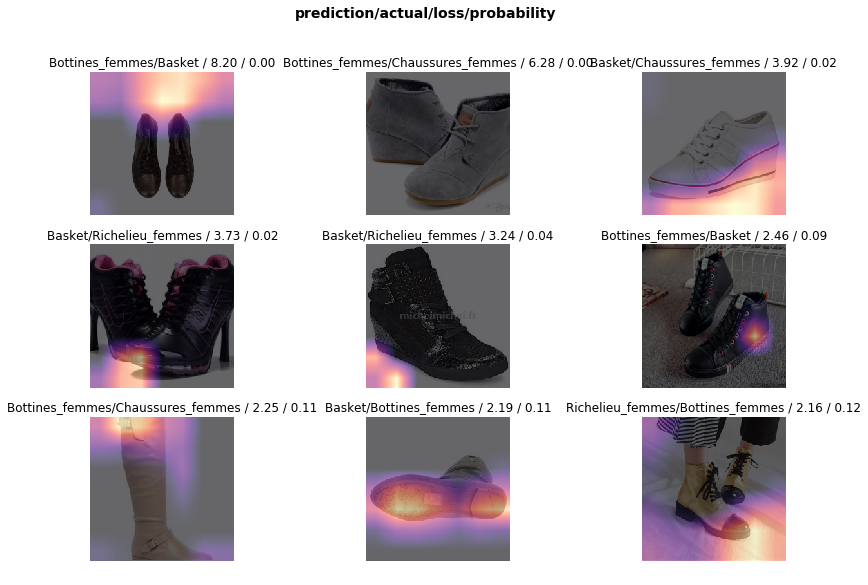

In [53]:
interp.plot_top_losses(9, figsize=(14,9))

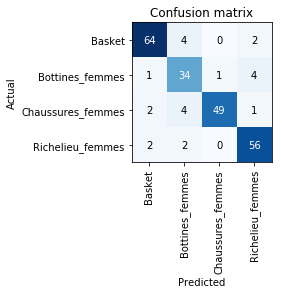

In [54]:
interp.plot_confusion_matrix()

In [55]:
interp.most_confused(min_val=1)

[('Basket', 'Bottines_femmes', 4),
 ('Bottines_femmes', 'Richelieu_femmes', 4),
 ('Chaussures_femmes', 'Bottines_femmes', 4),
 ('Basket', 'Richelieu_femmes', 2),
 ('Chaussures_femmes', 'Basket', 2),
 ('Richelieu_femmes', 'Basket', 2),
 ('Richelieu_femmes', 'Bottines_femmes', 2),
 ('Bottines_femmes', 'Basket', 1),
 ('Bottines_femmes', 'Chaussures_femmes', 1),
 ('Chaussures_femmes', 'Richelieu_femmes', 1)]

In [57]:
learn.export()


In [41]:
defaults.device = torch.device('cpu')

In [42]:
img = open_image(path/'basket'/'00000015.jpg')
img

FileNotFoundError: [Errno 2] No such file or directory: '/home/fatima_moqran/work/cours_Data_IA_simplon/semaine4/projetchaussures/data/basket/00000015.jpg'